In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [504]:
data=pd.read_csv('/home/kirankumar/Downloads/sangam/DataSets/Train.csv').set_index('date_time')
data=data.dropna()

In [505]:
#Test Data Preperation

test_data=pd.read_csv('/home/kirankumar/Downloads/sangam/DataSets/Test.csv').set_index('date_time')
test_data=test_data.dropna()

test_subset = test_data.drop(['weather_type','weather_description','is_holiday'], axis=1)
test_weather_type=test_data['weather_type']
test_weather_description=test_data['weather_description']
test_is_holiday=test_data['is_holiday']

scaler=MinMaxScaler()
test_subset = pd.DataFrame(scaler.fit_transform(test_subset.values), columns=test_subset.columns, index=test_subset.index)
test_data=pd.concat([test_subset,test_weather_type,test_weather_description,test_is_holiday], axis=1)
#test_data=test_data.head(10125)

In [506]:
data.describe(include='all')

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
count,33750,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750,33750,33750.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,38,NaN
top,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN
freq,33707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11213,7524,NaN
mean,NaN,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,NaN,NaN,3240.118163
std,NaN,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,NaN,NaN,1991.487289
min,NaN,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,NaN,NaN,1165.250000
50%,NaN,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,NaN,NaN,3335.000000
75%,NaN,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,NaN,NaN,4926.000000


In [507]:
x_data = data.drop(['traffic_volume'], axis=1)
y = data['traffic_volume']

Let’s check if all the input variables are continuous or some of them are categorical

In [508]:
#x_data.describe(include='all')

In [509]:
#x_data.weather_type.unique()
#x_data.weather_description.unique()
x_data.is_holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

Data Preprocessing

We will put all continuous variables into DataFrame x_subset. To do this we drop the categorical variable from the input feature DataFrame.

In [510]:
x_subset= x_data.drop(['weather_type','weather_description','is_holiday'], axis=1)
x_weather_type = x_data['weather_type']
x_weather_description=x_data['weather_description']
x_is_holiday=x_data['is_holiday']

In [511]:
x_is_holiday

date_time
2012-10-02 09:00:00    None
2012-10-02 10:00:00    None
2012-10-02 11:00:00    None
2012-10-02 12:00:00    None
2012-10-02 13:00:00    None
2012-10-02 14:00:00    None
2012-10-02 15:00:00    None
2012-10-02 16:00:00    None
2012-10-02 17:00:00    None
2012-10-02 18:00:00    None
2012-10-02 19:00:00    None
2012-10-02 20:00:00    None
2012-10-02 21:00:00    None
2012-10-02 22:00:00    None
2012-10-02 23:00:00    None
2012-10-03 00:00:00    None
2012-10-03 01:00:00    None
2012-10-03 02:00:00    None
2012-10-03 03:00:00    None
2012-10-03 04:00:00    None
2012-10-03 05:00:00    None
2012-10-03 06:00:00    None
2012-10-03 08:00:00    None
2012-10-03 09:00:00    None
2012-10-03 12:00:00    None
2012-10-03 13:00:00    None
2012-10-03 14:00:00    None
2012-10-03 15:00:00    None
2012-10-03 16:00:00    None
2012-10-03 18:00:00    None
                       ... 
2017-05-17 10:00:00    None
2017-05-17 10:00:00    None
2017-05-17 11:00:00    None
2017-05-17 12:00:00    None
2017-05-17

In [512]:
#x_subset=x_subset[['humidity','wind_direction','temperature','clouds_all']]

Using MinMaxScaler we scale the continuous input variable

In [513]:
scaler = MinMaxScaler()
x_subset = pd.DataFrame(scaler.fit_transform(x_subset.values), columns=x_subset.columns, index=x_subset.index)

After we have scaled the continuous variables, we concatenate the two DataFrames so that we have all input features

In [514]:
x_data=pd.concat([x_subset,x_weather_type,x_weather_description,x_is_holiday], axis=1)
x_data.head(2)

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,is_holiday
date_time,,,,,,,,,,,,,
2012-10-02 09:00:00,0.384083,0.873563,0.1250,0.913889,0.0,0.0,0.935245,0.0,0.0,0.40,Clouds,scattered clouds,None
2012-10-02 10:00:00,0.581315,0.620690,0.1875,0.916667,0.0,0.0,0.938749,0.0,0.0,0.75,Clouds,broken clouds,None


In [515]:
x_data.describe(include='all')

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,is_holiday
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750,33750,33750
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,38,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,sky is clear,None
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11213,7524,33707
mean,0.501181,0.669069,0.211137,0.554088,0.498719,0.498719,0.908609,0.000046,0.000623,0.504588,NaN,NaN,NaN
std,0.289742,0.193704,0.128487,0.277336,0.321253,0.321253,0.043522,0.005444,0.019136,0.388717,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.252595,0.540230,0.125000,0.361111,0.250000,0.250000,0.881521,0.000000,0.000000,0.010000,NaN,NaN,NaN
50%,0.501730,0.678161,0.187500,0.555556,0.500000,0.500000,0.908870,0.000000,0.000000,0.640000,NaN,NaN,NaN
75%,0.754325,0.827586,0.312500,0.805556,0.750000,0.750000,0.942837,0.000000,0.000000,0.900000,NaN,NaN,NaN


Creating train and test data

In [516]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3)

Converting raw data to Dense Tensors

In [517]:
air_pollution_index= tf.feature_column.numeric_column('air_pollution_index')
humidity  = tf.feature_column.numeric_column('humidity')
wind_speed = tf.feature_column.numeric_column('wind_speed')
wind_direction = tf.feature_column.numeric_column('wind_direction')
visibility_in_miles = tf.feature_column.numeric_column('visibility_in_miles')
dew_point = tf.feature_column.numeric_column('dew_point')
temperature = tf.feature_column.numeric_column('temperature')
rain_p_h = tf.feature_column.numeric_column('rain_p_h')

snow_p_h = tf.feature_column.numeric_column('snow_p_h')
clouds_all = tf.feature_column.numeric_column('clouds_all')
#weather_type = tf.feature_column.numeric_column('weather_type')
#weather_description = tf.feature_column.numeric_column('weather_description')

We need to convert the categorical column weather_type and weather description sparse column of integers for which we pass the column name and the size of the vocabulary

In [518]:
weather_type = tf.contrib.layers.sparse_column_with_hash_bucket('weather_type',hash_bucket_size=1000)
weather_description = tf.contrib.layers.sparse_column_with_hash_bucket('weather_description',hash_bucket_size=1000)
is_holiday = tf.contrib.layers.sparse_column_with_hash_bucket('is_holiday',hash_bucket_size=1000)

For the categorical columns, we will use the embedding column for feeding sparse data into a DNN.

Instead of representing the data as a sparse vector of many dimensions, an embedding column represents the data as a lower-dimensional vector containing any number and not just 0 or 1 as in a sparse vector.

In [519]:
import math
weather_description_embedding_size = int(math.floor(len(x_data.weather_description.unique())**0.25))
weather_type_embedding_size = int(math.floor(len(x_data.weather_type.unique())**0.25))
is_holiday_embedding_size = int(math.floor(len(x_data.is_holiday.unique())**0.25))

In [520]:
weather_type=tf.contrib.layers.embedding_column(sparse_id_column=weather_type, dimension=weather_type_embedding_size)
weather_description=tf.contrib.layers.embedding_column(sparse_id_column=weather_description, dimension=weather_description_embedding_size)
is_holiday=tf.contrib.layers.embedding_column(sparse_id_column=is_holiday, dimension=is_holiday_embedding_size)

In [521]:
#feature_col =[air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles ,dew_point ,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description]
feature_col=[is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description]

In [522]:
feature_col

[_EmbeddingColumn(sparse_id_column=_SparseColumnHashed(column_name='is_holiday', is_integerized=False, bucket_size=1000, lookup_config=None, combiner='sum', dtype=tf.string), dimension=1, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7f770c3bc9b0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, shared_embedding_name=None, shared_vocab_size=None, max_norm=None, trainable=True),
 _NumericColumn(key='air_pollution_index', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='humidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='wind_speed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='wind_direction', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='visibility_in_miles', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='dew_poin

In [523]:
#opti = tf.train.AdamOptimizer(learning_rate = 0.0001)
opti = tf.train.AdamOptimizer(learning_rate = 0.0001)

In [524]:
input_func= tf.estimator.inputs.pandas_input_fn(x=x_train, 
                                                y= y_train, 
                                                batch_size=10, 
                                                num_epochs=10000, 
                                                shuffle=True)

In [525]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x= x_test,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                      y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=4, 
                                                      shuffle=True)

DNNRegressor

We now create a regressor for Tensorflow the DNN model. We have 3 hidden layers with units 9, 9 and 3. we use Adam optimizer that we created and 50% of the nodes will be dropped

In [526]:
#estimator = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=opti, dropout=0.5)
estimator = tf.estimator.DNNRegressor(hidden_units=[1024, 512, 256], feature_columns=feature_col, optimizer=opti, dropout=0.5)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_tf_random_seed': None, '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_task_id': 0, '_num_ps_replicas': 0, '_master': '', '_model_dir': '/tmp/tmpxt7ltn93', '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f770c0ed5c0>, '_service': None}


Training the model

we now train the model

In [527]:
estimator.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpxt7ltn93/model.ckpt.
INFO:tensorflow:step = 1, loss = 164292030.0
INFO:tensorflow:global_step/sec: 124.81
INFO:tensorflow:step = 101, loss = 215559620.0 (0.802 sec)
INFO:tensorflow:global_step/sec: 163.744
INFO:tensorflow:step = 201, loss = 88176710.0 (0.611 sec)
INFO:tensorflow:global_step/sec: 161.053
INFO:tensorflow:step = 301, loss = 45982290.0 (0.621 sec)
INFO:tensorflow:global_step/sec: 159.436
INFO:tensorflow:step = 401, loss = 33507964.0 (0.627 sec)
INFO:tensorflow:global_step/sec: 156.465
INFO:tensorflow:step = 501, loss = 37313310.0 (0.642 sec)
INFO:tensorflow:global_step/sec: 166.529
INFO:tensorflow:step = 601, loss = 26624016.0 (0.597 sec)
INFO:tensorflow:global_step/sec: 176.91
INFO:tensorflow:step = 701, loss = 64692956.0 (0.565 sec)
INFO:tensorflow:global_step/sec: 175.742
INFO:tensorflow:step = 801, loss = 26475678.0 (0.569 sec)
INFO:tensorflow:global_step/sec: 168.593
INFO

INFO:tensorflow:global_step/sec: 178.175
INFO:tensorflow:step = 8201, loss = 58291360.0 (0.561 sec)
INFO:tensorflow:global_step/sec: 178.1
INFO:tensorflow:step = 8301, loss = 45717130.0 (0.562 sec)
INFO:tensorflow:global_step/sec: 172.045
INFO:tensorflow:step = 8401, loss = 44330944.0 (0.581 sec)
INFO:tensorflow:global_step/sec: 169.692
INFO:tensorflow:step = 8501, loss = 32912520.0 (0.589 sec)
INFO:tensorflow:global_step/sec: 164.849
INFO:tensorflow:step = 8601, loss = 28355284.0 (0.609 sec)
INFO:tensorflow:global_step/sec: 158.648
INFO:tensorflow:step = 8701, loss = 44375344.0 (0.629 sec)
INFO:tensorflow:global_step/sec: 148.344
INFO:tensorflow:step = 8801, loss = 41662320.0 (0.674 sec)
INFO:tensorflow:global_step/sec: 163.758
INFO:tensorflow:step = 8901, loss = 34048508.0 (0.611 sec)
INFO:tensorflow:global_step/sec: 178.707
INFO:tensorflow:step = 9001, loss = 16468158.0 (0.559 sec)
INFO:tensorflow:global_step/sec: 159.504
INFO:tensorflow:step = 9101, loss = 35571936.0 (0.627 sec)
IN

Evaluating the model

In [528]:
result_eval = estimator.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-08-03-19:28:13
INFO:tensorflow:Restoring parameters from /tmp/tmpxt7ltn93/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2019-08-03-19:28:24
INFO:tensorflow:Saving dict for global step 10000: average_loss = 3861914.8, global_step = 10000, loss = 38619148.0


In [529]:
#let’s print metrics
result_eval

{'average_loss': 3861914.8, 'global_step': 10000, 'loss': 38619148.0}

In [530]:
test_input_func_new = tf.estimator.inputs.pandas_input_fn(x= test_data,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
predictions_test=[]
for pred in estimator.predict(input_fn=test_input_func_new):
    predictions_test.append(np.array(pred['predictions']).astype(float))

INFO:tensorflow:Restoring parameters from /tmp/tmpxt7ltn93/model.ckpt-10000


In [531]:
len(predictions_test)

14454

INFO:tensorflow:Restoring parameters from /tmp/tmpxt7ltn93/model.ckpt-10000


Text(0, 0.5, 'predicted values')

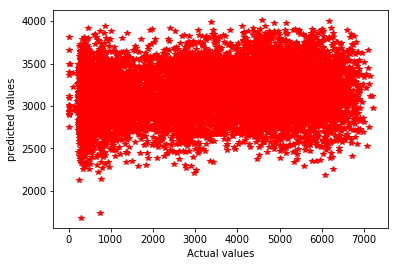

In [532]:
#We will predict the data from our model and plot it against the test data
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

In [533]:
#We can check the RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))**0.5

44.33030475493065

In [534]:
predictions_out=[]
for predict in predictions_test:
    predictions_out.append(int(predict))

In [535]:
#out={'traffic_volume':predictions_out}
#out=pd.DataFrame(predictions_out)

In [536]:
test_data['traffic_volume']=predictions_out

In [537]:
test_data

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,is_holiday,traffic_volume
date_time,,,,,,,,,,,,,,
2017-05-18 00:00:00,0.217993,0.588889,0.0625,0.075000,0.375,0.375,0.610138,0.000000,0.0,0.978261,Rain,moderate rain,None,2583
2017-05-18 00:00:00,0.833910,0.588889,0.0625,0.075000,0.375,0.375,0.610138,0.000000,0.0,0.978261,Mist,mist,None,2409
2017-05-18 00:00:00,0.224913,0.511111,0.0625,0.000000,0.000,0.000,0.610138,0.000000,0.0,0.978261,Drizzle,light intensity drizzle,None,2491
2017-05-18 01:00:00,0.304498,0.511111,0.0625,0.975000,0.125,0.125,0.604506,0.000000,0.0,0.978261,Rain,heavy intensity rain,None,2545
2017-05-18 01:00:00,0.944637,0.511111,0.0625,0.975000,0.000,0.000,0.604506,0.000000,0.0,0.978261,Mist,mist,None,2552
2017-05-18 02:00:00,0.363322,0.433333,0.0625,0.075000,0.375,0.375,0.596683,0.000000,0.0,0.978261,Rain,heavy intensity rain,None,2320
2017-05-18 02:00:00,0.131488,0.433333,0.0625,0.075000,0.000,0.000,0.596683,0.000000,0.0,0.978261,Mist,mist,None,2243
2017-05-18 02:00:00,0.425606,0.433333,0.0625,0.075000,0.000,0.000,0.596683,0.000000,0.0,0.978261,Drizzle,drizzle,None,2401
2017-05-18 03:00:00,0.415225,0.555556,0.1250,0.100000,0.625,0.625,0.584481,0.000000,0.0,0.978261,Rain,heavy intensity rain,None,2415


In [538]:
final=test_data['traffic_volume']

In [539]:
export_csv = final.to_csv('submit.csv',header=True)